# Client segmentation  | Cristiane Carneiro

Clustering with K-Means

## Import libraries

In [1]:
#%pip install yellowbrick

In [2]:
# data
# ==============================================================================
import numpy as np
import pandas as pd

# charts
# ==============================================================================
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits import mplot3d
from scipy.spatial.transform import Rotation as R

# pre-processing 
# ==============================================================================
from sklearn.preprocessing import StandardScaler

#from sklearn import metrics
from sklearn.cluster import KMeans, DBSCAN
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

#display
# ==============================================================================
pd.set_option('display.max_columns',None)

## Import dataset

In [3]:
data_men = pd.read_csv('../data/data_clean_men.csv')

In [4]:
data_men.head()

,client_id,residence_country 1,residence_country 2,residence_country 3,residence_country 4,residence_country 5,residence_country 6,residence_country 7,residence_other region 1,residence_other region 2,residence_other region 3,residence_other region 4,residence_other region 5,residence_other region 6,residence_other region 7,residence_other region 8,generation_gen silent/boomers,generation_gen x,generation_gen z/alpha,generation_millennials,category_children clothes,category_handbags,category_men clothes,category_men shoes,category_other,category_soft,category_women clothes,category_women shoes,color_cool_jewel,color_neutral_pastel,color_other,color_vivid_metallic,color_warm_earth,season_autumn,season_spring,season_summer,season_winter,total_sum
0,124710,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2,3,1,0,2,4,2,6,1,0,3,0,2,0,10,12
1,382440,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2,2,0,0,1,0,0,3,1,1,0,0,0,4,1,5
2,1311915,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,4,3,2,0,0,2,3,6,1,2,1,7,1,3,2,13
3,1958756,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,2,6,6,25,5,1,10,1,25,14,2,13,7,20,16,12,55
4,1958794,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,3,10,4,5,1,1,3,3,8,5,2,9,9,9,6,3,27


In [5]:
client_id = data_men['client_id']

In [6]:
data_men_model = data_men.drop(columns=['client_id','total_sum'],axis=1)
data_men_model.head(2)

,residence_country 1,residence_country 2,residence_country 3,residence_country 4,residence_country 5,residence_country 6,residence_country 7,residence_other region 1,residence_other region 2,residence_other region 3,residence_other region 4,residence_other region 5,residence_other region 6,residence_other region 7,residence_other region 8,generation_gen silent/boomers,generation_gen x,generation_gen z/alpha,generation_millennials,category_children clothes,category_handbags,category_men clothes,category_men shoes,category_other,category_soft,category_women clothes,category_women shoes,color_cool_jewel,color_neutral_pastel,color_other,color_vivid_metallic,color_warm_earth,season_autumn,season_spring,season_summer,season_winter
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2,3,1,0,2,4,2,6,1,0,3,0,2,0,10
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2,2,0,0,1,0,0,3,1,1,0,0,0,4,1


## Clustering | K-Means

### Normalization

In [7]:
data_men_model.columns

Index(['residence_country 1', 'residence_country 2', 'residence_country 3',
       'residence_country 4', 'residence_country 5', 'residence_country 6',
       'residence_country 7', 'residence_other region 1',
       'residence_other region 2', 'residence_other region 3',
       'residence_other region 4', 'residence_other region 5',
       'residence_other region 6', 'residence_other region 7',
       'residence_other region 8', 'generation_gen silent/boomers',
       'generation_gen x', 'generation_gen z/alpha', 'generation_millennials',
       'category_children clothes', 'category_handbags',
       'category_men clothes', 'category_men shoes', 'category_other',
       'category_soft', 'category_women clothes', 'category_women shoes',
       'color_cool_jewel', 'color_neutral_pastel', 'color_other',
       'color_vivid_metallic', 'color_warm_earth', 'season_autumn',
       'season_spring', 'season_summer', 'season_winter'],
      dtype='object')

In [8]:
columns_to_normalize = ['category_children clothes', 'category_handbags',
                        'category_men clothes', 'category_men shoes',
                        'category_other', 'category_soft',
                        'category_women clothes', 'category_women shoes',
                        'color_cool_jewel', 'color_neutral_pastel',
                        'color_other', 'color_vivid_metallic',
                        'color_warm_earth', 'season_autumn',
                        'season_spring', 'season_summer', 'season_winter']

In [9]:
# Create a MinMaxScaler
scaler =  StandardScaler()

# Fit and transform the selected columns
normalized_data = scaler.fit_transform(data_men_model[columns_to_normalize])

# Replace the original columns with the normalized data
data_men_model[columns_to_normalize] = normalized_data

In [10]:
data_men_model.head()

,residence_country 1,residence_country 2,residence_country 3,residence_country 4,residence_country 5,residence_country 6,residence_country 7,residence_other region 1,residence_other region 2,residence_other region 3,residence_other region 4,residence_other region 5,residence_other region 6,residence_other region 7,residence_other region 8,generation_gen silent/boomers,generation_gen x,generation_gen z/alpha,generation_millennials,category_children clothes,category_handbags,category_men clothes,category_men shoes,category_other,category_soft,category_women clothes,category_women shoes,color_cool_jewel,color_neutral_pastel,color_other,color_vivid_metallic,color_warm_earth,season_autumn,season_spring,season_summer,season_winter
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,-0.169479,-0.587370,-0.462858,0.142229,-0.645594,-0.421482,-0.016951,0.766969,-0.138574,-0.168472,-0.765283,-0.616309,-0.384092,-0.852132,-0.489209,-0.823536,0.796206
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,-0.169479,-0.587370,-0.462858,-0.147951,-0.820060,-0.421482,-0.251733,-0.665587,-0.792741,-0.637626,-0.765283,0.079945,-0.956589,-0.852132,-0.837939,-0.134049,-0.669219
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,-0.169479,0.350989,-0.218775,0.142229,-0.471127,-0.421482,-0.486515,0.050691,0.188510,-0.168472,-0.765283,0.776200,-0.765757,0.370087,-0.663574,-0.306421,-0.506394
3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,-0.169479,0.350989,0.025309,1.012769,3.541608,2.135713,-0.251733,2.915804,-0.465657,2.802841,2.368223,0.776200,1.524230,0.370087,2.649362,1.934414,1.121856
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,-0.169479,0.820169,0.513476,0.432409,0.052273,0.089957,-0.251733,0.408830,0.188510,0.144298,0.198873,0.776200,0.760901,0.719292,0.731346,0.210695,-0.343569


### Determining optimal # of clusters 

#### Inercia 

In [11]:
# store model scores
inercia = {}

# number of clusters we want to test for 
clusters = range(1,11)

# calcuate inercial for each 
for i in clusters:
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(data_men_model)
    
    inercia[i] = kmeans.inertia_

In [12]:
inercia

{1: 57507.59605597962,
 2: 42003.287682192204,
 3: 38611.74384502385,
 4: 36021.66439688819,
 5: 34206.93024842277,
 6: 32638.36407204638,
 7: 31535.079815871162,
 8: 30619.513082832527,
 9: 29749.366044146453,
 10: 29073.109245711898}

In [13]:
inercias_results = pd.DataFrame(inercia, index = [0]).T.reset_index()
inercias_results.columns = ["num_clus", "inercia"]
inercias_results

,num_clus,inercia
0,1,57507.596056
1,2,42003.287682
2,3,38611.743845
3,4,36021.664397
4,5,34206.930248
5,6,32638.364072
6,7,31535.079816
7,8,30619.513083
8,9,29749.366044
9,10,29073.109246


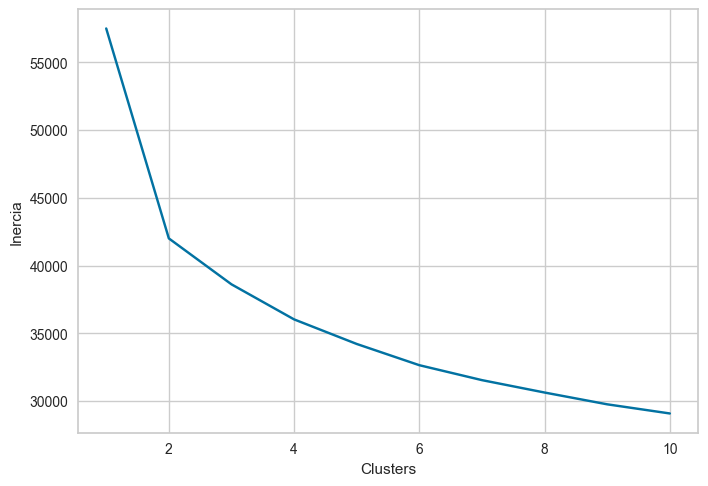

In [14]:
#chart results
sns.lineplot(data=inercias_results, x="num_clus", y="inercia")

#labels
plt.xlabel('Clusters')
plt.ylabel('Inercia')
plt.show();

#### Silhouette Score

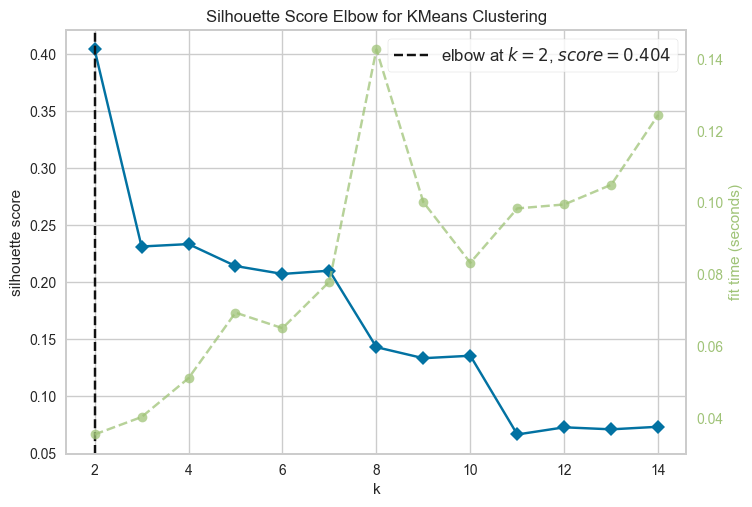

In [15]:
model = KMeans()

visualizer = KElbowVisualizer(model, k=(2,15), metric='silhouette')

visualizer.fit(data_men_model)  

visualizer.show();

### K-Means

In [16]:
#model 
kmeans = KMeans(n_clusters=3)

#fit
km_fit = kmeans.fit(data_men_model)

In [17]:
# clusters
labels = km_fit.labels_
labels

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [18]:
# centers
centroids = km_fit.cluster_centers_
centroids[0]

array([ 6.06530160e-01,  1.00166021e-01,  6.41947980e-02,  2.26895407e-02,
        1.43884892e-02,  1.10680686e-02,  3.04371887e-02,  1.93691201e-02,
        6.17995238e-18,  7.74764804e-03,  5.20199225e-02,  1.21748755e-02,
        3.59712230e-02,  1.99225235e-02,  3.32042059e-03,  9.96126176e-02,
        4.21140011e-01,  5.53403431e-03,  4.73713337e-01, -1.15124944e-01,
       -2.35550204e-01, -4.34829942e-01, -3.98145165e-01, -4.59347617e-01,
       -2.86192369e-01, -2.68104338e-01, -3.70474452e-01, -4.79413722e-01,
       -5.95046855e-01, -5.71065012e-01, -3.65857880e-01, -5.77036581e-01,
       -4.72489582e-01, -4.75507161e-01, -4.59237326e-01, -5.03420419e-01])

### Clusters 

In [19]:
data_men_model['cluster'] = labels
data_men_model.head(3)

,residence_country 1,residence_country 2,residence_country 3,residence_country 4,residence_country 5,residence_country 6,residence_country 7,residence_other region 1,residence_other region 2,residence_other region 3,residence_other region 4,residence_other region 5,residence_other region 6,residence_other region 7,residence_other region 8,generation_gen silent/boomers,generation_gen x,generation_gen z/alpha,generation_millennials,category_children clothes,category_handbags,category_men clothes,category_men shoes,category_other,category_soft,category_women clothes,category_women shoes,color_cool_jewel,color_neutral_pastel,color_other,color_vivid_metallic,color_warm_earth,season_autumn,season_spring,season_summer,season_winter,cluster
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,-0.169479,-0.587370,-0.462858,0.142229,-0.645594,-0.421482,-0.016951,0.766969,-0.138574,-0.168472,-0.765283,-0.616309,-0.384092,-0.852132,-0.489209,-0.823536,0.796206,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,-0.169479,-0.587370,-0.462858,-0.147951,-0.820060,-0.421482,-0.251733,-0.665587,-0.792741,-0.637626,-0.765283,0.079945,-0.956589,-0.852132,-0.837939,-0.134049,-0.669219,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,-0.169479,0.350989,-0.218775,0.142229,-0.471127,-0.421482,-0.486515,0.050691,0.188510,-0.168472,-0.765283,0.776200,-0.765757,0.370087,-0.663574,-0.306421,-0.506394,0


### Visualization 

In [20]:
data_men_model.head()

,residence_country 1,residence_country 2,residence_country 3,residence_country 4,residence_country 5,residence_country 6,residence_country 7,residence_other region 1,residence_other region 2,residence_other region 3,residence_other region 4,residence_other region 5,residence_other region 6,residence_other region 7,residence_other region 8,generation_gen silent/boomers,generation_gen x,generation_gen z/alpha,generation_millennials,category_children clothes,category_handbags,category_men clothes,category_men shoes,category_other,category_soft,category_women clothes,category_women shoes,color_cool_jewel,color_neutral_pastel,color_other,color_vivid_metallic,color_warm_earth,season_autumn,season_spring,season_summer,season_winter,cluster
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,-0.169479,-0.587370,-0.462858,0.142229,-0.645594,-0.421482,-0.016951,0.766969,-0.138574,-0.168472,-0.765283,-0.616309,-0.384092,-0.852132,-0.489209,-0.823536,0.796206,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,-0.169479,-0.587370,-0.462858,-0.147951,-0.820060,-0.421482,-0.251733,-0.665587,-0.792741,-0.637626,-0.765283,0.079945,-0.956589,-0.852132,-0.837939,-0.134049,-0.669219,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,-0.169479,0.350989,-0.218775,0.142229,-0.471127,-0.421482,-0.486515,0.050691,0.188510,-0.168472,-0.765283,0.776200,-0.765757,0.370087,-0.663574,-0.306421,-0.506394,0
3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,-0.169479,0.350989,0.025309,1.012769,3.541608,2.135713,-0.251733,2.915804,-0.465657,2.802841,2.368223,0.776200,1.524230,0.370087,2.649362,1.934414,1.121856,2
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,-0.169479,0.820169,0.513476,0.432409,0.052273,0.089957,-0.251733,0.408830,0.188510,0.144298,0.198873,0.776200,0.760901,0.719292,0.731346,0.210695,-0.343569,1


#### 2d

In [21]:
features = data_men_model.drop(columns=['cluster'])

In [22]:
pca = PCA(n_components=2)

data_transformed = pd.DataFrame(pca.fit_transform(features), columns=["PC1", "PC2"])
data_transformed.head(3)

,PC1,PC2
0,-1.215982,-0.321382
1,-2.335085,0.310156
2,-0.909934,-0.107057


In [23]:
data_transformed['cluster'] = data_men_model['cluster']

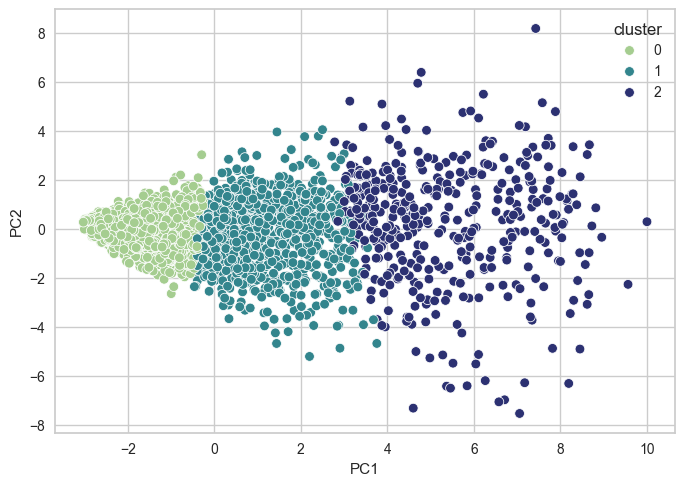

In [24]:
pca_plot = sns.scatterplot(x=data_transformed["PC1"],
                           y=data_transformed["PC2"],
                           hue=data_transformed["cluster"],
                           palette="crest")

### Evaluation

#### Silhouette score

In [25]:
silhouette_score(data_men_model, labels)

0.24447386611545466

## Export clusters 

In [26]:
data_men_model['client_id'] = client_id

In [27]:
data_men_model.head(2)

,residence_country 1,residence_country 2,residence_country 3,residence_country 4,residence_country 5,residence_country 6,residence_country 7,residence_other region 1,residence_other region 2,residence_other region 3,residence_other region 4,residence_other region 5,residence_other region 6,residence_other region 7,residence_other region 8,generation_gen silent/boomers,generation_gen x,generation_gen z/alpha,generation_millennials,category_children clothes,category_handbags,category_men clothes,category_men shoes,category_other,category_soft,category_women clothes,category_women shoes,color_cool_jewel,color_neutral_pastel,color_other,color_vivid_metallic,color_warm_earth,season_autumn,season_spring,season_summer,season_winter,cluster,client_id
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,-0.169479,-0.58737,-0.462858,0.142229,-0.645594,-0.421482,-0.016951,0.766969,-0.138574,-0.168472,-0.765283,-0.616309,-0.384092,-0.852132,-0.489209,-0.823536,0.796206,0,124710
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,-0.169479,-0.58737,-0.462858,-0.147951,-0.820060,-0.421482,-0.251733,-0.665587,-0.792741,-0.637626,-0.765283,0.079945,-0.956589,-0.852132,-0.837939,-0.134049,-0.669219,0,382440


In [28]:
data_men_model.shape

(3144, 38)

In [29]:
data_men_labels = data_men_model.iloc[:,[37,36]]
data_men_labels.head(3)

,client_id,cluster
0,124710,0
1,382440,0
2,1311915,0


In [30]:
data_men_labels.to_csv('../data/clusters_men.csv',index=False)